#### Problema:

Foi realizada a comparação entre 3 tipos distintos de tratamento de solo com o solo sem tratamento, para a produção de soja, com o intúito de se descobrir/comprovar a eficácia dos tratamentos. 

Para essa análise, foram comparados os seguintes parametros: número de plantas que cresceu em cada segmento amostral, a produtividade, ou seja, quantidade de grãos por parcela que foi observada e o peso de mil grãos. 

#### Definição:

A ANOVA é um teste paramétrico (possui estimativas de parâmetros) utilizado quando o pesquisador deseja verificar se existem diferenças entre as médias de uma determinada variável (variável resposta) em relação a um tratamento com dois ou mais níveis categóricos (variável preditora). A ANOVA é indicada para análises com um “n” amostral superior a 30.

#### Premissas:

Amostras independentes – isso significa que uma observação não pode ser influenciada pela anterior ou pela próxima. Esse pressuposto garante que os dados sejam coletados aleatoriamente dentro do espaço amostral.

Homogeneidade das variâncias entre os grupos – as variância dentro de cada grupo é igual (ou pelo menos aproximadamente) àquela dentro de todos os grupos. Desta forma, cada tratamento contribui de forma igual para a soma dos quadrados.

Resíduos seguem uma distribuição normal – assume-se que a média geral dos resíduos é igual a zero, ou seja, distribuem-se normalmente. Esse pressuposto não é muito restritivo dependendo do tamanho amostral.

# PRÉ-PROCESSAMENTO

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import scipy.stats as stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

In [2]:
# Carregando os dados
matrix = pd.read_csv('colunas.csv')

In [3]:
matrix.head()

,plntas ha-1,TRATAMENTO,Npla,PRODUTIVIDADE,Massa_mil
0,1,D,66667,2695,190
1,2,A,77778,3260,180
2,3,C,65278,2985,170
3,4,B,75000,3245,210
4,5,C,83333,2995,180


In [4]:
matrix_dois = pd.read_csv('joao.csv')

In [5]:
matrix_dois

,Mn foliar,Npla,Prod,MMG
0,NaN,NaN,kg/ha,g
1,Sem,92188.0,3925,188
2,1 DAA,96007.0,3666,199
3,14 DAA,99132.0,3808,180
4,1/14 DAA,96701.0,3796,173


In [6]:
# Obtendo estatística descritiva de Npla
rp.summary_cont(matrix['Npla'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Npla,32.0,96007.0312,18138.9719,3206.5475,89467.2345,102546.828


#### Sobre as descritivas:

* Variable: A variável é 'Npla' o numero de plantas;
* N: Quantidade de elementos. No caso, temos 32 amostras;
* Mean: A média da variável Npla é 96007.03. 
* SD: Desvio padrão de Npla é de 18138.97;
* SE: Erro Padrão = SD/raiz(n) de Npla é 3206.55;
* O intervalo de confiança 95% vai de 89467.2345 a 102546.828. Isso significa que se escolhermos da população 100 amostras de forma aleatória, 95 estarão nesse intervalo.

In [7]:
# Obtendo estatística descritiva de PRODUTIVIDADE Gr/PARCELA
rp.summary_cont(matrix['PRODUTIVIDADE'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,PRODUTIVIDADE,32.0,2734.0,448.3609,79.2598,2572.3487,2895.6513


#### Sobre as descritivas:

* Variable: A variável é 'PRODUTIVIDADE', produtividade Gr/parcela;
* N: Quantidade de elementos. No caso, temos 32 amostras;
* Mean: A média da variável PRODUTIVIDADE é 2734.0; 
* SD: Desvio padrão de PRODUTIVIDADE é de 448.36;
* SE: Erro Padrão = SD/raiz(n) de PRODUTIVIDADE é 79.26;
* O intervalo de confiança 95% vai de 2572.35 a 2895.65. Isso significa que se escolhermos da população 100 amostras de forma aleatória, 95 estarão nesse intervalo.

In [8]:
# Obtém estatística descritiva de Massa mil grãos
rp.summary_cont(matrix['Massa_mil'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Massa_mil,32.0,184.6875,21.2488,3.7563,177.0265,192.3485


#### Sobre as descritivas:

* Variable: A variável é 'Massa_mil', massa em mil grãos;
* N: Quantidade de elementos. No caso, temos 32 amostras;
* Mean: A média da variável Massa_mil é 184.69; 
* SD: Desvio padrão de Massa_mil é de 21.25;
* SE: Erro Padrão = SD/raiz(n) de Massa_mil é 3.76;
* O intervalo de confiança 95% vai de 177.03 a 192.35. Isso significa que se escolhermos da população 100 amostras de forma aleatória, 95 estarão nesse intervalo.

### Separado os resultados por grupos

In [9]:
rp.summary_cont(matrix['Npla'].groupby(matrix['TRATAMENTO']))

,N,Mean,SD,SE,95% Conf.,Interval
TRATAMENTO,,,,,,
A,8,92187.625,14489.7373,5122.8957,80073.9015,104301.3485
B,8,96007.000,14744.2501,5212.8796,83680.4984,108333.5016
C,8,96701.500,23534.4477,8320.6838,77026.2094,116376.7906
D,8,99132.000,21154.1867,7479.1344,81446.6574,116817.3426


Comparação dos dados por numero de plantas

In [10]:
rp.summary_cont(matrix['PRODUTIVIDADE'].groupby(matrix['TRATAMENTO']))

,N,Mean,SD,SE,95% Conf.,Interval
TRATAMENTO,,,,,,
A,8,2817.50,284.3790,100.5432,2579.7532,3055.2468
B,8,2637.25,474.3106,167.6941,2240.7165,3033.7835
C,8,2732.50,631.2063,223.1651,2204.7983,3260.2017
D,8,2748.75,408.7590,144.5181,2407.0189,3090.4811


Comparação dos dados por produtividade gr/parcela

In [11]:
rp.summary_cont(matrix['Massa_mil'].groupby(matrix['TRATAMENTO']))

,N,Mean,SD,SE,95% Conf.,Interval
TRATAMENTO,,,,,,
A,8,187.50,8.8641,3.1339,180.0895,194.9105
B,8,198.75,22.9518,8.1147,179.5618,217.9382
C,8,172.50,23.7547,8.3986,152.6406,192.3594
D,8,180.00,20.0000,7.0711,163.2796,196.7204


Comparação dos dados por massa mil grãos

### Gráficos para mostrar distribuição

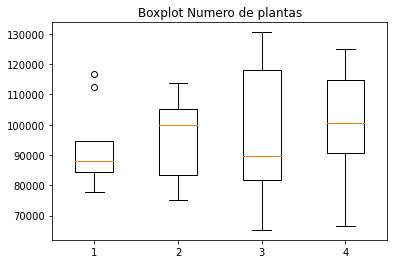

In [12]:
fig1, ax1 = plt.subplots()

matrix_npla = [matrix[matrix['TRATAMENTO']=='A']['Npla'], 
               matrix[matrix['TRATAMENTO']=='B']['Npla'], 
               matrix[matrix['TRATAMENTO']=='C']['Npla'], 
               matrix[matrix['TRATAMENTO']=='D']['Npla']]

ax1.set_title('Boxplot Numero de plantas')

ax1.boxplot(matrix_npla )

plt.show()

Sobre o Boxplot:

- O gráfico serve para mostrar a distribuição do número de plantas;
- O traço no meio da caixa representa a mediana;
- Dentro da caixa, temos 50% da amostra. O limite inferior é o p25 e o superior o p75. Ou seja, para 3 (TRATAMENTO C), temos que 25% da amostra apresentou até no máximo 80000 plantas. 50% da amostra até 900000. E por aí vai. O máximo foi 130000 e o mínimo 70000. Dentro da caixa estaria o "grosso" da amostra.


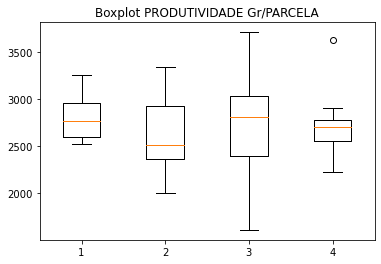

In [13]:
fig2, ax1 = plt.subplots()

matrix_prod = [matrix[matrix['TRATAMENTO']=='A']['PRODUTIVIDADE'], 
               matrix[matrix['TRATAMENTO']=='B']['PRODUTIVIDADE'], 
               matrix[matrix['TRATAMENTO']=='C']['PRODUTIVIDADE'], 
               matrix[matrix['TRATAMENTO']=='D']['PRODUTIVIDADE']]

ax1.set_title('Boxplot PRODUTIVIDADE Gr/PARCELA')

ax1.boxplot(matrix_prod )

plt.show()

Sobre o Boxplot:

- O gráfico serve para mostrar a distribuição da produtividade Gr/parcela;
- O traço no meio da caixa representa a mediana;
- Dentro da caixa, temos 50% da amostra. O limite inferior é o p25 e o superior o p75. Ou seja, para 1 (TRATAMENTO A), temos que 25% da amostra apresentou até no máximo um pouco mais de 2500 gr/parcela. 50% da amostra entre 2500 e 2750. E por aí vai. O máximo foi proximo de 3250 e o mínimo 2500. Dentro da caixa estaria o "grosso" da amostra.

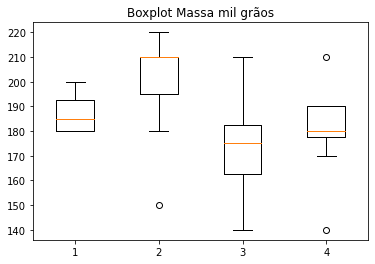

In [14]:
fig3, ax1 = plt.subplots()

matrix_mil = [matrix[matrix['TRATAMENTO']=='A']['Massa_mil'], 
              matrix[matrix['TRATAMENTO']=='B']['Massa_mil'], 
              matrix[matrix['TRATAMENTO']=='C']['Massa_mil'], 
              
              matrix[matrix['TRATAMENTO']=='D']['Massa_mil']]

ax1.set_title('Boxplot Massa mil grãos')

ax1.boxplot(matrix_mil)

plt.show()

Sobre o Boxplot:

- O gráfico serve para mostrar a distribuição da massa em mil grãos;
- O traço no meio da caixa representa a mediana;
- Dentro da caixa, temos 50% da amostra. O limite inferior é o p25 e o superior o p75. Ou seja, para 2 (TRATAMENTO B), temos que 25% da amostra apresentou até no máximo algo próximo de 200g. 50% da amostra entre 200 e 210. E por aí vai. O máximo foi proximo de 220 e o mínimo 150. Dentro da caixa estaria o "grosso" da amostra.

# RODANDO ANOVA

Para considerarmos algum tratamento estatisticamente relevante, o ideal é um p-value < 0,05.

In [15]:
stats.f_oneway(matrix['Npla'][matrix['TRATAMENTO']=='A'], 
               matrix['Npla'][matrix['TRATAMENTO']=='B'], 
               matrix['Npla'][matrix['TRATAMENTO']=='C'], 
               matrix['Npla'][matrix['TRATAMENTO']=='D']) 

F_onewayResult(statistic=0.1854203362695743, pvalue=0.9054160830169149)

Para o número de plantas, observamos um p-value= 0.905, então, a princípio, a diferença não pode ser considerada estatisticamente relevante.

In [16]:
stats.f_oneway(matrix['PRODUTIVIDADE'][matrix['TRATAMENTO']=='A'], 
               matrix['PRODUTIVIDADE'][matrix['TRATAMENTO']=='B'], 
               matrix['PRODUTIVIDADE'][matrix['TRATAMENTO']=='C'], 
               matrix['PRODUTIVIDADE'][matrix['TRATAMENTO']=='D']) 

F_onewayResult(statistic=0.20263026720579894, pvalue=0.8936915909121956)

Para a produtividade, observamos um p-value= 0.894, então, a princípio, a diferença não pode ser medida estatisticamente

In [17]:
stats.f_oneway(matrix['Massa_mil'][matrix['TRATAMENTO']=='A'], 
               matrix['Massa_mil'][matrix['TRATAMENTO']=='B'], 
               matrix['Massa_mil'][matrix['TRATAMENTO']=='C'], 
               matrix['Massa_mil'][matrix['TRATAMENTO']=='D']) 

F_onewayResult(statistic=2.5563139931740615, pvalue=0.07532239567149511)

Para o número de plantas, observamos um p-value= 0.07, e apesar de ser menor do que nos outros dois casos, continua sendo maior que 0,05, então, a princípio, a diferença não pode ser medida estatisticamente

F= 2.556
p-value= 0.075

In [18]:
results_npla = ols('Npla ~ C(TRATAMENTO)', data=matrix).fit()
results_npla.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Npla   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                 -0.086
Method:                 Least Squares   F-statistic:                    0.1854
Date:                Thu, 27 May 2021   Prob (F-statistic):              0.905
Time:                        14:44:57   Log-Likelihood:                -358.37
No. Observations:                  32   AIC:                             724.7
Df Residuals:                      28   BIC:                             730.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           9.219e+04   6681.867     13.797      0.000    7.85e+04    1.06e+05
C(TRATAMENTO)[T.B]  3819.3750   9449.587      0.404      0.689   -1.55e+04    2.32e+04
C(TRATAMENTO)[T.C]  4513.8750   9449.587      0.478      0.637   -1.48e+04    2.39e+04
C(TRATAMENTO)[T.D]  6944.3750   9449.587      0.735      0.469   -1.24e+04    2.63e+04
==============================================================================
Omnibus:                        1.851   Durbin-Watson:                   1.176
Prob(Omnibus):                  0.396   Jarque-Bera (JB):                1.110
Skew:                           0.023   Prob(JB):                        0.574
Kurtosis:                       2.089   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

F= 0.18, p = 0.905

Os coeficientes são a diferença entre o grupo controle e o respectivo grupo listado. O intercepto é a média para TRATAMENTO A. Olhando pelos p-values (na tabela P>|t|), podemos observar que a diferença entre o TRATAMENTO A e os outros não foi significativa. (Bp-value = 0.689, Cp-value = 0.637, Dp-value = 0.469)

Olhando para a tabela, especificamente para o P-Valor e o F-Estatística, nós conseguimos saber se nós explicamos uma quantidade significativa da variação.

Ok, mas e quanto a comparação dos grupos entre si? Para isso, precisamos fazer algumas análises adicionais. Nós precisamos da tabela ANOVA.

R-squared: é chamado de eta-quadrado na ANOVA. O modelo responde por 1,9% da variação do número de plantas.

F-statistic: serve para avaliar se os valores esperados de uma variável entre diferentes grupos se difere. Em outras palavras, em um ensaio clínico, por exemplo, a F-statistic serve para avaliar se algum dos tratamentos é superior ou inferior aos outros, contra a hipótese de que todos produzem a mesma resposta média. Nesse exemplo, um único teste é feito para detectar possíveis diferenças. Alternativamente, poderíamos executar testes em pares para avaliar diferenças entre tratamentos. 

In [19]:
results_prod = ols('PRODUTIVIDADE ~ C(TRATAMENTO)', data=matrix).fit()
results_prod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          PRODUTIVIDADE   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                 -0.084
Method:                 Least Squares   F-statistic:                    0.2026
Date:                Thu, 27 May 2021   Prob (F-statistic):              0.894
Time:                        14:44:57   Log-Likelihood:                -239.93
No. Observations:                  32   AIC:                             487.9
Df Residuals:                      28   BIC:                             493.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2817.5000    165.014     17.074      0.000    2479.484    3155.516
C(TRATAMENTO)[T.B]  -180.2500    233.365     -0.772      0.446    -658.276     297.776
C(TRATAMENTO)[T.C]   -85.0000    233.365     -0.364      0.718    -563.026     393.026
C(TRATAMENTO)[T.D]   -68.7500    233.365     -0.295      0.770    -546.776     409.276
==============================================================================
Omnibus:                        1.122   Durbin-Watson:                   1.356
Prob(Omnibus):                  0.571   Jarque-Bera (JB):                0.320
Skew:                           0.153   Prob(JB):                        0.852
Kurtosis:                       3.384   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

F= 0.20, p = 0.89

Os coeficientes são a diferença entre o grupo controle e o respectivo grupo listado. O intercepto é a média para TRATAMENTO A. Olhando pelos p-values (na tabela P>|t|), podemos observar que a diferença entre o TRATAMENTO A e os outros não foi significativa. (Bp-value = 0.446, Cp-value = 0.718, Dp-value = 0.770)

R-squared: é chamado de eta-quadrado na ANOVA. O modelo responde por 2,1% da variação da produção gr/parcela.

In [20]:
results_massa = ols('Massa_mil ~ C(TRATAMENTO)', data=matrix).fit()
results_massa.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Massa_mil   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     2.556
Date:                Thu, 27 May 2021   Prob (F-statistic):             0.0753
Time:                        14:44:57   Log-Likelihood:                -138.83
No. Observations:                  32   AIC:                             285.7
Df Residuals:                      28   BIC:                             291.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            187.5000      7.004     26.772      0.000     173.154     201.846
C(TRATAMENTO)[T.B]    11.2500      9.905      1.136      0.266      -9.039      31.539
C(TRATAMENTO)[T.C]   -15.0000      9.905     -1.514      0.141     -35.289       5.289
C(TRATAMENTO)[T.D]    -7.5000      9.905     -0.757      0.455     -27.789      12.789
==============================================================================
Omnibus:                        5.059   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.080   Jarque-Bera (JB):                3.502
Skew:                          -0.740   Prob(JB):                        0.174
Kurtosis:                       3.661   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

F= 2.56, p = 0,07

Os coeficientes são a diferença entre o grupo controle e o respectivo grupo listado. O intercepto é a média para TRATAMENTO A. Olhando pelos p-values (na tabela P>|t|), podemos observar que a diferença entre o TRATAMENTO A e os outros não foi significativa. (Bp-value = 0.266, Cp-value = 0.141, Dp-value = 0.455)

R-squared: é chamado de eta-quadrado na ANOVA. O modelo responde por 21,5% da variação da massa em mil grãos.

## Obtendo a tabela ANOVA

In [21]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov


In [22]:
aov_table_npla = sm.stats.anova_lm(results_npla, typ=2)
aov_table_npla

,sum_sq,df,F,PR(>F)
C(TRATAMENTO),1.986846e+08,3.0,0.18542,0.905416
Residual,1.000101e+10,28.0,NaN,NaN


In [23]:
anova_table(aov_table_npla)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(TRATAMENTO),1.986846e+08,3.0,6.622822e+07,0.18542,0.905416,0.019479,-0.082681
Residual,1.000101e+10,28.0,3.571788e+08,NaN,NaN,NaN,NaN





- Sum_sq: explained variance
- df: degrees of freedom.
- mean_sq: To calculate the mean squares, one divides the sum of squares (SSM and SSR) by the degrees of freedom respectively.


- O modelo explica 1,9% da variação em numero de plantas.

In [24]:
aov_table_prod = sm.stats.anova_lm(results_prod, typ=2)
aov_table_prod

,sum_sq,df,F,PR(>F)
C(TRATAMENTO),132421.0,3.0,0.20263,0.893692
Residual,6099431.0,28.0,NaN,NaN


In [25]:
anova_table(aov_table_prod)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(TRATAMENTO),132421.0,3.0,44140.333333,0.20263,0.893692,0.021249,-0.080793
Residual,6099431.0,28.0,217836.821429,NaN,NaN,NaN,NaN


- O modelo explica 2,1% da variação em numero de plantas.

In [26]:
aov_table_massa = sm.stats.anova_lm(results_massa, typ=2)
aov_table_massa

,sum_sq,df,F,PR(>F)
C(TRATAMENTO),3009.375,3.0,2.556314,0.075322
Residual,10987.500,28.0,NaN,NaN


In [27]:
anova_table(aov_table_massa)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(TRATAMENTO),3009.375,3.0,1003.125000,2.556314,0.075322,0.215003,0.127327
Residual,10987.500,28.0,392.410714,NaN,NaN,NaN,NaN


- O modelo explica 21,5% da variação em numero de plantas.

# Assumption Checks/Model Diagnostics

Aqui conseguimos observar alguns dados que já estão presentes nas tabelas ANOVA, porem de forma mais crua

In [28]:
results_npla.diagn

{'jb': 1.109511970233142,
 'jbpv': 0.57421236046479,
 'skew': 0.022540356815834686,
 'kurtosis': 2.088900824864101,
 'omni': 1.8509772563315223,
 'omnipv': 0.3963377099847365,
 'condno': 4.79128784747792,
 'mineigval': 1.6696972201766398}

In [29]:
results_prod.diagn

{'jb': 0.3202438822391144,
 'jbpv': 0.8520398839338378,
 'skew': 0.1525018325403159,
 'kurtosis': 3.383608753767061,
 'omni': 1.121534584600502,
 'omnipv': 0.5707709476353833,
 'condno': 4.79128784747792,
 'mineigval': 1.6696972201766398}

In [30]:
results_massa.diagn

{'jb': 3.502172558347456,
 'jbpv': 0.17358527892446307,
 'skew': -0.739969484347645,
 'kurtosis': 3.6606134026022437,
 'omni': 5.059259737087837,
 'omnipv': 0.0796885100522749,
 'condno': 4.79128784747792,
 'mineigval': 1.6696972201766398}

## Variância de Homogeneidade

### Em número de plantas

In [31]:
stats.levene(matrix['Npla'][matrix['TRATAMENTO'] == 'A'], 
             matrix['Npla'][matrix['TRATAMENTO'] == 'B'],
             matrix['Npla'][matrix['TRATAMENTO'] == 'C'],
             matrix['Npla'][matrix['TRATAMENTO'] == 'D'])

LeveneResult(statistic=0.882753594726079, pvalue=0.4619626394066142)

### Em produtividade gr/parcela 

In [32]:
stats.levene(matrix['PRODUTIVIDADE'][matrix['TRATAMENTO'] == 'A'], 
             matrix['PRODUTIVIDADE'][matrix['TRATAMENTO'] == 'B'],
             matrix['PRODUTIVIDADE'][matrix['TRATAMENTO'] == 'C'],
             matrix['PRODUTIVIDADE'][matrix['TRATAMENTO'] == 'D'])

LeveneResult(statistic=1.2103542435986596, pvalue=0.32419693343482175)

### Em massa mil grãos

In [33]:
stats.levene(matrix['Massa_mil'][matrix['TRATAMENTO'] == 'A'], 
             matrix['Massa_mil'][matrix['TRATAMENTO'] == 'B'],
             matrix['Massa_mil'][matrix['TRATAMENTO'] == 'C'],
             matrix['Massa_mil'][matrix['TRATAMENTO'] == 'D'])

LeveneResult(statistic=0.5935275080906149, pvalue=0.6244518726835835)

# Normalidade

### Em numero de plantas

In [34]:
stats.shapiro(results_npla.resid)

ShapiroResult(statistic=0.968481719493866, pvalue=0.4585838317871094)

### Em produtividade 

In [35]:
stats.shapiro(results_prod.resid)

ShapiroResult(statistic=0.9741491079330444, pvalue=0.6207704544067383)

### Em massa

In [36]:
stats.shapiro(results_massa.resid)

ShapiroResult(statistic=0.9329955577850342, pvalue=0.04749016836285591)

# Tukey

Dado que através da ANOVA, já se constou que as amostras não apresentam diferença significativa, o teste de tukey não precisaria ter sido rodado, porém, foi realizado para exemplo do que deveria ser feito no caso de uma diferença significativa aparecer na ANOVA.

In [37]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [38]:
multi_npla = MultiComparison(matrix['Npla'], matrix['TRATAMENTO'])
tukey_npla = multi_npla.tukeyhsd()
print(tukey_npla)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2 meandiff p-adj     lower      upper    reject
-----------------------------------------------------------
     A      B 3819.375    0.9 -21980.9295 29619.6795  False
     A      C 4513.875    0.9 -21286.4295 30314.1795  False
     A      D 6944.375 0.8748 -18855.9295 32744.6795  False
     B      C    694.5    0.9 -25105.8045 26494.8045  False
     B      D   3125.0    0.9 -22675.3045 28925.3045  False
     C      D   2430.5    0.9 -23369.8045 28230.8045  False
-----------------------------------------------------------


In [39]:
multi_prod = MultiComparison(matrix['PRODUTIVIDADE'], matrix['TRATAMENTO'])
tukey_prod = multi_prod.tukeyhsd()
print(tukey_prod)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     A      B  -180.25 0.8542 -817.4087 456.9087  False
     A      C    -85.0    0.9 -722.1587 552.1587  False
     A      D   -68.75    0.9 -705.9087 568.4087  False
     B      C    95.25    0.9 -541.9087 732.4087  False
     B      D    111.5    0.9 -525.6587 748.6587  False
     C      D    16.25    0.9 -620.9087 653.4087  False
-------------------------------------------------------


In [40]:
multi_massa = MultiComparison(matrix['Massa_mil'], matrix['TRATAMENTO'])
tukey_massa = multi_massa.tukeyhsd()
print(tukey_massa)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B    11.25 0.6542 -15.7928 38.2928  False
     A      C    -15.0  0.444 -42.0428 12.0428  False
     A      D     -7.5 0.8625 -34.5428 19.5428  False
     B      C   -26.25 0.0596 -53.2928  0.7928  False
     B      D   -18.75 0.2539 -45.7928  8.2928  False
     C      D      7.5 0.8625 -19.5428 34.5428  False
-----------------------------------------------------


# BONFERRONI CORRECTION POST-HOC COMPARISON

Aqui comparamos cada tratamento de forma individual, para ver se alguma das comparações apresenta diferenças estatisticamente significativas.

## Numero de plantas

### Comparando TRATAMENTO A com os demais

In [41]:
stats.ttest_ind(matrix['Npla'][matrix['TRATAMENTO'] == 'A'], matrix['Npla'][matrix['TRATAMENTO'] == 'B'])

Ttest_indResult(statistic=-0.5225739767314821, pvalue=0.6094414620643112)

In [42]:
stats.ttest_ind(matrix['Npla'][matrix['TRATAMENTO'] == 'A'], matrix['Npla'][matrix['TRATAMENTO'] == 'C'])

Ttest_indResult(statistic=-0.4619534741545486, pvalue=0.6512115142485289)

In [43]:
stats.ttest_ind(matrix['Npla'][matrix['TRATAMENTO'] == 'A'], matrix['Npla'][matrix['TRATAMENTO'] == 'D'])

Ttest_indResult(statistic=-0.766030567539342, pvalue=0.45638031314849437)

### Comparando TRATAMENTO B com os demais

In [44]:
stats.ttest_ind(matrix['Npla'][matrix['TRATAMENTO'] == 'B'], matrix['Npla'][matrix['TRATAMENTO'] == 'C'])

Ttest_indResult(statistic=-0.07073200283184261, pvalue=0.9446115136839646)

In [45]:
stats.ttest_ind(matrix['Npla'][matrix['TRATAMENTO'] == 'B'], matrix['Npla'][matrix['TRATAMENTO'] == 'D'])

Ttest_indResult(statistic=-0.3427830111085046, pvalue=0.7368540526126057)

### Comparando TRATAMENTO C com os demais

In [46]:
stats.ttest_ind(matrix['Npla'][matrix['TRATAMENTO'] == 'C'], matrix['Npla'][matrix['TRATAMENTO'] == 'D'])

Ttest_indResult(statistic=-0.21724178629405816, pvalue=0.8311540357141467)

## Produtividade 

### Comparando TRATAMENTO A com os demais

In [47]:
stats.ttest_ind(matrix['PRODUTIVIDADE'][matrix['TRATAMENTO'] == 'A'], matrix['PRODUTIVIDADE'][matrix['TRATAMENTO'] == 'B'])

Ttest_indResult(statistic=0.9218744002049397, pvalue=0.3722084037243548)

In [48]:
stats.ttest_ind(matrix['PRODUTIVIDADE'][matrix['TRATAMENTO'] == 'A'], matrix['PRODUTIVIDADE'][matrix['TRATAMENTO'] == 'C'])

Ttest_indResult(statistic=0.34726694048438256, pvalue=0.7335558997693308)

In [49]:
stats.ttest_ind(matrix['PRODUTIVIDADE'][matrix['TRATAMENTO'] == 'A'], matrix['PRODUTIVIDADE'][matrix['TRATAMENTO'] == 'D'])

Ttest_indResult(statistic=0.3905089106781994, pvalue=0.7020378015365281)

### Comparando TRATAMENTO B com os demais

In [50]:
stats.ttest_ind(matrix['PRODUTIVIDADE'][matrix['TRATAMENTO'] == 'B'], matrix['PRODUTIVIDADE'][matrix['TRATAMENTO'] == 'C'])

Ttest_indResult(statistic=-0.3412160022495988, pvalue=0.7380079396915964)

In [51]:
stats.ttest_ind(matrix['PRODUTIVIDADE'][matrix['TRATAMENTO'] == 'B'], matrix['PRODUTIVIDADE'][matrix['TRATAMENTO'] == 'D'])

Ttest_indResult(statistic=-0.5036706901495229, pvalue=0.6223250077202374)

### Comparando TRATAMENTO C com os demais

In [52]:
stats.ttest_ind(matrix['PRODUTIVIDADE'][matrix['TRATAMENTO'] == 'C'], matrix['PRODUTIVIDADE'][matrix['TRATAMENTO'] == 'D'])

Ttest_indResult(statistic=-0.06111952875745774, pvalue=0.9521279803534399)

## Massa mil grãos

### Comparando TRATAMENTO A com os demais

In [53]:
stats.ttest_ind(matrix['Massa_mil'][matrix['TRATAMENTO'] == 'A'], matrix['Massa_mil'][matrix['TRATAMENTO'] == 'B'])

Ttest_indResult(statistic=-1.2932773761577272, pvalue=0.21684836425203396)

In [54]:
stats.ttest_ind(matrix['Massa_mil'][matrix['TRATAMENTO'] == 'A'], matrix['Massa_mil'][matrix['TRATAMENTO'] == 'C'])

Ttest_indResult(statistic=1.6733200530681511, pvalue=0.11645184136419628)

In [55]:
stats.ttest_ind(matrix['Massa_mil'][matrix['TRATAMENTO'] == 'A'], matrix['Massa_mil'][matrix['TRATAMENTO'] == 'D'])

Ttest_indResult(statistic=0.9696899027331812, pvalue=0.34865650606184473)

### Comparando TRATAMENTO B com os demais

In [56]:
stats.ttest_ind(matrix['Massa_mil'][matrix['TRATAMENTO'] == 'B'], matrix['Massa_mil'][matrix['TRATAMENTO'] == 'C'])

Ttest_indResult(statistic=2.2477484642984717, pvalue=0.041228542061812465)

In [57]:
stats.ttest_ind(matrix['Massa_mil'][matrix['TRATAMENTO'] == 'B'], matrix['Massa_mil'][matrix['TRATAMENTO'] == 'D'])

Ttest_indResult(statistic=1.7420338920138307, pvalue=0.10341781625430495)

### Comparando TRATAMENTO C com os demais

In [58]:
stats.ttest_ind(matrix['Massa_mil'][matrix['TRATAMENTO'] == 'C'], matrix['Massa_mil'][matrix['TRATAMENTO'] == 'D'])

Ttest_indResult(statistic=-0.6831300510639732, pvalue=0.5056732339622882)